# ASSIGNMENT 2- LINEAR MODELS

### Abstract : 

#### Aim

* The main aim of this project is to create predictive linear models using both linear and logistic regression on Personal Loan.Dataset has been taken from https://www.kaggle.com/deyritwik/personal-loan-prediction/data data.The dataset contains 14 features and 5000 observations. 

##### Column descriptions
* ID Customer ID
* Age Customer's age in completed years
* Experience #years of professional experience
* Income Annual income of the customer (USD 1000)
* ZIPCode Home Address ZIP code.
* Family Family size of the customer
* CCAvg Avg. spending on credit cards per month (USD 1000)
* Education Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage Value of house mortgage if any. (USD 1000)
* Personal Loan- Did this customer accept the personal loan offered in the last campaign?
* Securities Account Does the customer have a securities account with the bank?
* CD Account Does the customer have a certificate of deposit (CD) account with the bank?
* Online Does the customer use internet banking facilities?
* CreditCard Does the customer uses a credit card issued by UniversalBank?

#### Methods used:

1. For Part A:
Step wise regression with - Backward elimination
2. For Part B:
Logistic Regression
3. For Part C:
VIF factors and Heat map
4. For Part D:
Interaction and Synergy effects
5. For Part E:
Linear Regression with Regression Regularization (Ridge Regression)



#### Findings/Results

1. There are no missing values in the data
2. Education is a categorical column which needs to be handled
3. Not much collinearity

#### Conclusion

1. CC Avg is a continuos variable on which we will be performing our linear regression.
2. Personal Loan is binary variable where we will be performing Logistic Regression



### IMPORTING LIBRARIES, DATA CLEANING AND PRE-PROCESSING


In [774]:
# importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [775]:
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [776]:
from __future__ import print_function
%matplotlib inline

import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

In [777]:
# importing the dataset
df=pd.read_csv("personalloan.csv", decimal = ',')

In [778]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [779]:
df.shape

(5000, 14)

In [780]:
#finding the correlation between the variables
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.016972,-0.000436,-0.001232,-0.002616,0.004704,0.019994,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


#### Handling Categorical Columns

* "Education" column in our data is a multi categorical column with values 1= Undergrad, 2=Grad, 3=Post grad
* Inorder to remove the order of preference for the categories, we created dummy variables for the Education column.
* The phenomenon where one or several independent variables predict another is Multi-collinearity. As a result of this the model cannot distinguish between the effects of Dummy variable 1,2 and 3. It won't work properly and this is called Dummy variable trap.
* To avoid this trap we drop one dummy variable column. So for N dummy columns, we have N-1 columns retained. 
* Here we dropped Education_1 and have only Education_2 & Education_3

In [781]:
df= pd.get_dummies(df,columns =['Education'], drop_first=True)

In [782]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028,-0.004722,0.021977
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681,-0.016264,0.045838
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967,-0.018197,0.020967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385,-0.128364,-0.108878
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691,0.037141,-0.034123
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588,0.139201,-0.008744
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231,-0.031806,-0.014942
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802,0.071491,0.090212
Securities Account,-0.016972,-0.000436,-0.001232,-0.002616,0.004704,0.019994,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028,0.005134,-0.012421
CD Account,-0.006909,0.008043,0.010353,0.169738,0.019972,0.014110,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644,0.006089,0.009780


In [783]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3
0,1,25,1,49,91107,4,1.60,0,0,1,0,0,0,0,0
1,2,45,19,34,90089,3,1.50,0,0,1,0,0,0,0,0
2,3,39,15,11,94720,1,1.00,0,0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.00,0,0,0,0,0,1,1,0


In [784]:
df.shape

(5000, 15)

In [785]:
#changing the datatype of CCAvg from object to float
df["CCAvg"] = df.CCAvg.astype(float)

In [786]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Education_2           5000 non-null uint8
Education_3           5000 non-null uint8
dtypes: float64(1), int64(12), uint8(2)
memory usage: 517.7 KB


In [787]:
#checking if there are any null values
df.isnull().values.any()

False

In [788]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Education_2           0
Education_3           0
dtype: int64

In [789]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,0.280600,0.300200
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,0.449337,0.458391
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [790]:
# Finding correlation amongst the features and target variable, CCAvg

df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028,-0.004722,0.021977
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681,-0.016264,0.045838
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967,-0.018197,0.020967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385,-0.128364,-0.108878
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691,0.037141,-0.034123
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588,0.139201,-0.008744
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689,-0.090366,-0.080413
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231,-0.031806,-0.014942
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802,0.071491,0.090212
Securities Account,-0.016972,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028,0.005134,-0.012421


In [791]:
# Draw the heatmap using seaborn to visualise the correlation amongst the variables
def generateHeatMap(x):
    plt.figure(figsize=(16,12))
    sns.heatmap(data=df.corr(),annot=True,fmt='.2f',cmap='coolwarm')
    plt.show()

In [792]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3
0,1,25,1,49,91107,4,1.60,0,0,1,0,0,0,0,0
1,2,45,19,34,90089,3,1.50,0,0,1,0,0,0,0,0
2,3,39,15,11,94720,1,1.00,0,0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.00,0,0,0,0,0,1,1,0
5,6,37,13,29,92121,4,0.40,155,0,0,0,1,0,1,0
6,7,53,27,72,91711,2,1.50,0,0,0,0,1,0,1,0
7,8,50,24,22,93943,1,0.30,0,0,0,0,0,1,0,1
8,9,35,10,81,90089,3,0.60,104,0,0,0,1,0,1,0
9,10,34,9,180,93023,1,8.90,0,1,0,0,0,0,0,1


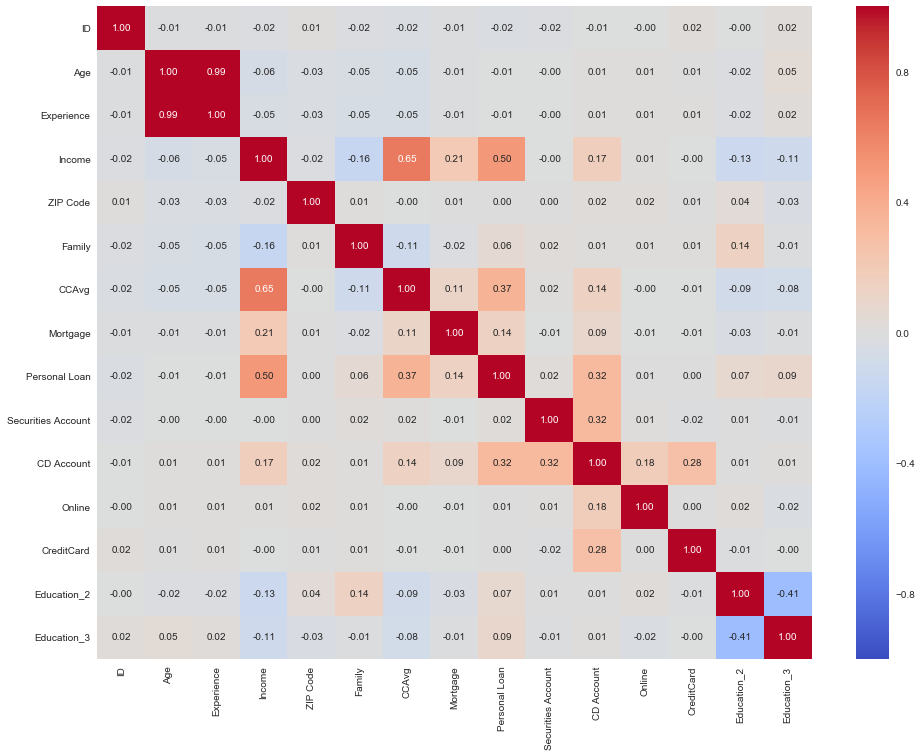

In [793]:
generateHeatMap(df)

In [794]:
# choose attributes which shows relation
p= df[['CCAvg','Age','Experience','Income','Family','Mortgage','Personal Loan','CD Account','Education_2','Education_3']]

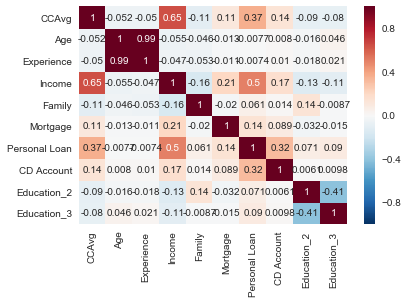

In [795]:
# show corr of the same
sns.heatmap(p.corr(), annot=True)

* From the above correlation matrix, we see that there is higher correlation of columns 'Income' , 'Personal loan' , 'CD Account' with the CCAvg. We also see high correlation between the following columns Age and Experience

In [796]:
# choose attributes which shows relation
d= df[['CCAvg','Income','Family','Mortgage','Personal Loan','Education_2','Education_3']]

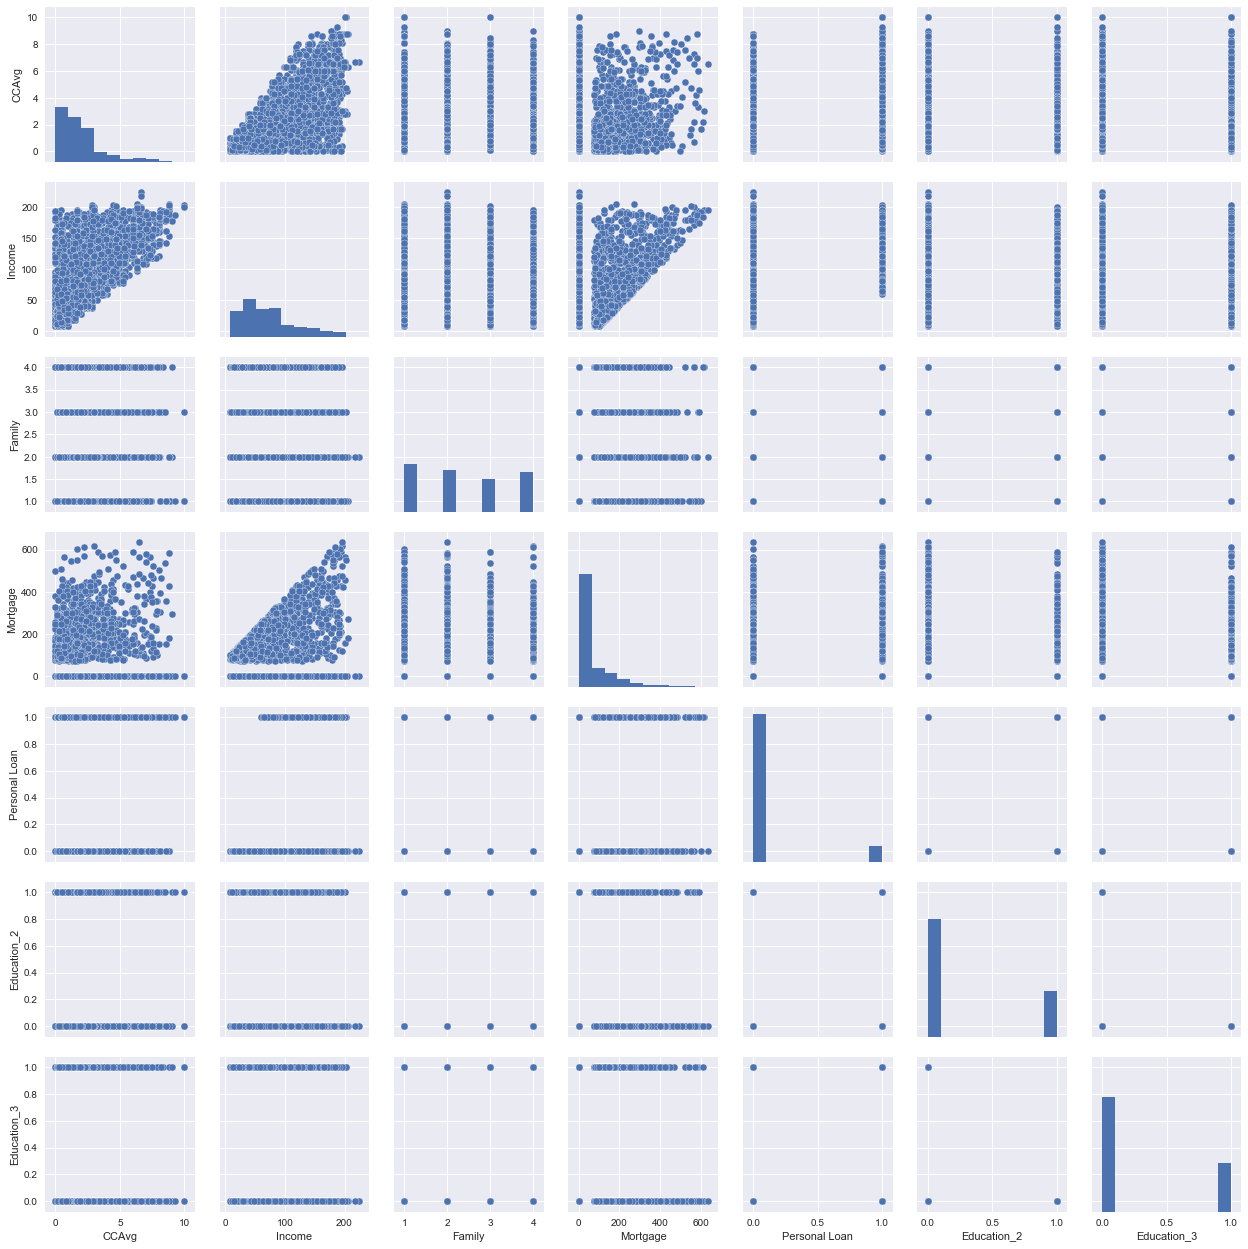

In [797]:
#Pairplot to find the correlation between the columns of the dataset df.
sns.pairplot(d)

From the pairplots, we seem to get the classical linear distribution of the data points, for example with CCAvg against Income. Thus in the latter analysis, we will implement some linear models

Now, Let us check the impact of all the continous variables with the target variable, CCAvg by visualising using a jointplot. Now, since they are continous variables, we can plot a regression line and check for the value of Pearson's coefficient r to measures the strength and direction of the relationship with target variable CCAvg.Mortgage and Income are the two continuos variables.

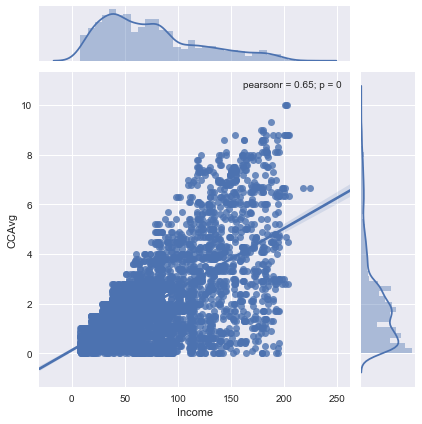

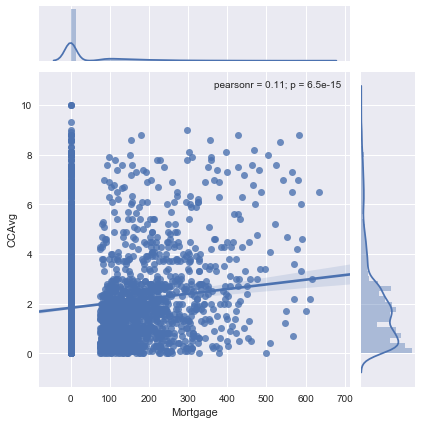

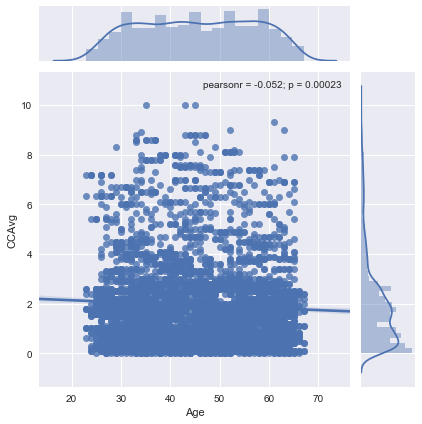

In [798]:
j1 = sns.jointplot(x='Income', y='CCAvg', data=df, kind='reg', size = 6)
j2 = sns.jointplot(x="Mortgage", y="CCAvg", data=df, kind = 'reg', size = 6)
j2 = sns.jointplot(x="Age", y="CCAvg", data=df, kind = 'reg', size = 6)

j1.annotate(stats.pearsonr)
j2.annotate(stats.pearsonr)
j3.annotate(stats.pearsonr)
plt.show()

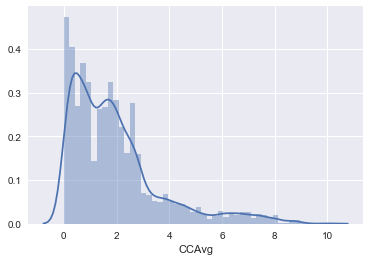

In [799]:
sns.distplot(df['CCAvg'])

There is a clear linear association between the variable (r = 0.65), indicating a strong positive relationship. Income should be a good predicator of CCAvg. 

* We are dropping ID, ZIP Code column , since they don't contribute much to the target variable CCAvg. For the rest independentvariables we are trying to find multi-collinearity using Variance Inflation Factor (VIF) method.

[Multi-Collinearity](#analyzing-multi-collinearity)

In [800]:
X = df[['Age','Experience','Income','Family','Mortgage','CD Account','Securities Account','Online','CreditCard','Personal Loan','Education_2','Education_3']]
y = df[["CCAvg"]]

In [801]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [802]:
vif.round(1)

,VIF Factor,features
0,64.8,Age
1,26.9,Experience
2,5.7,Income
3,5.7,Family
4,1.4,Mortgage
5,1.5,CD Account
6,1.3,Securities Account
7,2.6,Online
8,1.6,CreditCard
9,1.8,Personal Loan


* Age and Experience are highly correlated, VIF factor > 10 (threshhold) . We can observe it from VIF Factors as well as heatmaps. So moving forward we will drop the column Experience.
* VIF between 5 - 10 , collinearity exists but need not worry. So we will keep Income and Family


#### Test for multivariate normality

The linear regression analysis requires variables to be multivariate normal. This assumption can best be checked with a histogram or a Q-Q-Plot. Normality can also be checked with a goodness of fit test, e.g., the Kolmogorov-Smirnov test. When the data is not normally distributed a non-linear transformation (e.g., log-transformation) might fix this issue.

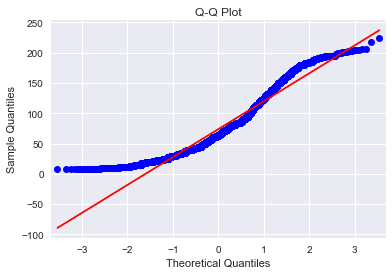

In [803]:
sm.qqplot(df['Income'], line='s')
plt.title('Q-Q Plot')
plt.show()

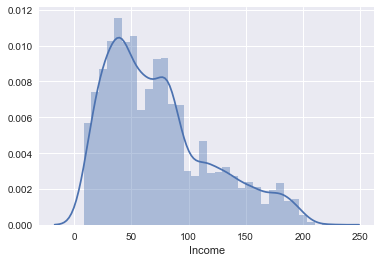

In [804]:
sns.distplot(df['Income'])


The above figures shows that Income are normally distributed and is right skewed.

### Data Analysis- Conclusion

* In this notebook, we analyzed the relationship between the output variable (CCAvg) and the dependent variables in our dataset.More specifically, we highlighted that Income is the strong predictor variable.

#### Then we also checked for the Assumptions of the linear model:

1. There must be a linear relationship between the outcome variable and the independent variables.  Scatterplots can show whether there is a linear or curvilinear relationship.
2. Multivariate Normality–Multiple regression assumes that the residuals are normally distributed.
3. No Multicollinearity—Multiple regression assumes that the independent variables are not highly correlated with each other.  This assumption is tested using Variance Inflation Factor (VIF) values.
4. Homoscedasticity–This assumption states that the variance of error terms are similar across the values of the independent variables.  A plot of standardized residuals versus predicted values can show whether points are equally distributed across all values of the independent variables.

# PART A -  Linear Models


## Model 1

####  Building a model step - by-step

1. Throwing all the variables create Garbage model. Few variables have impact & few don't
2. For that reason, *backward elimination* will be employed to remove less important variables or data.
3. The idea of Backward Elimination is to remove independent variables that are not statistically significant.
4. Our goal here is to find a group of independent variables that all big impact to the dependent variable (CCAvg)
5. Here, we have taken all the columns except ID, ZIP Code (not so useful) and Experience(because of its collinearity with Age) as predictor variables to predict our target- CCAvg
6. We have selected a  significant level P value as 0.05 ; If the P value is greater than this significant level, then we will remove it in our second and third models



In [805]:
#inputting the required libraries
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [806]:
#Choosing our dependent and Independent features

X = df[['Age','Income','Family','Mortgage','CD Account','Securities Account','Online','CreditCard','Personal Loan','Education_2','Education_3']]
y = df[["CCAvg"]]

In [807]:
#putting into an array
X_array= np.array(df[['Age','Income','Family','Mortgage','CD Account','Securities Account','Online','CreditCard','Personal Loan','Education_2','Education_3']])
y_array = np.array(df[["CCAvg"]])
y
X

,Age,Income,Family,Mortgage,CD Account,Securities Account,Online,CreditCard,Personal Loan,Education_2,Education_3
0,25,49,4,0,0,1,0,0,0,0,0
1,45,34,3,0,0,1,0,0,0,0,0
2,39,11,1,0,0,0,0,0,0,0,0
3,35,100,1,0,0,0,0,0,0,1,0
4,35,45,4,0,0,0,0,1,0,1,0
5,37,29,4,155,0,0,1,0,0,1,0
6,53,72,2,0,0,0,1,0,0,1,0
7,50,22,1,0,0,0,0,1,0,0,1
8,35,81,3,104,0,0,1,0,0,1,0
9,34,180,1,0,0,0,0,0,1,0,1


### Steps we are following for our linear regression

1. Splitting our dataset into train and test sets 80% train and 20% test. We train our model on the train sets and observe predictions on our test sets. Our framework takes care of the feature scaling.
2. Fitting the model: Creating and object regressor of the class Linear Regression.At this point, we’re supposed to fit this object to our training set. Fitting an object to a training set means that we need to create the *Regressor* object and then run the `.fit_transform()` method on it.
3. Predicting the results :And now, we can test the performance of the model in a separate set — the test set
4. Performing 5 fold cross validation to check 

In [808]:
# splitting dataset into training and testing dataset

from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [809]:
print(type(X_train), type(y_train))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [810]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [811]:
#Predicting the Test Set Results
y_pred=regressor.predict(X_test)

We’ll compare two columns:

- **y_test** — Column which contains the real CCAvg in the test.

- **y_pred** — Column which contains the predicted CCAvg. It is the vector of predictions.

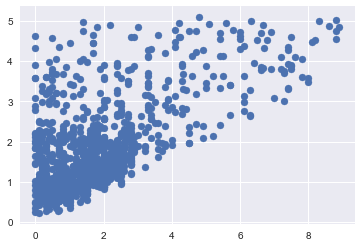

In [812]:
plt.scatter(y_test,y_pred)

1. Calculating the RMSE Value of the model
2.  Root Mean Squared Error (RMSE), which measures the average error performed by the model in predicting the outcome for an observation. Mathematically, the RMSE is the square root of the mean squared error (MSE), which is the average squared difference between the observed actual outome values and the values predicted by the model. So, MSE = mean((observeds - predicteds)^2) and RMSE = sqrt(MSE). The lower the RMSE, the better the model.It is not so good in our model

In [813]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt

#caluculating the mean and rmse values
rmse= np.sqrt(metrics.mean_squared_error(y_test, regressor.predict(X_test)))
mean = np.mean(y_test)
                                                              
mean ,rmse

(CCAvg    1.89858
 dtype: float64, 1.3366361842858379)

* We will build the optimal model with only highly statistically significant variables using Backward Elimination. For that we use P value. 
* The p-value is NOT the probability the claim is true.The p-value is NOT the probability the null hypothesis is true
* The p-value is actually the probability of getting a sample like ours, or more extreme than ours IF the null hypothesis is true. So, we assume the null hypothesis is true and then determine how “strange” our sample really is. If it is not that strange (a large p-value) then we don’t change our mind about the null hypothesis. As the p-value gets smaller, we start wondering if the null really is true and well maybe we should change our minds (and reject the null hypothesis).

In [814]:
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CCAvg   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     332.0
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:11:46   Log-Likelihood:                -8512.0
No. Observations:                5000   AIC:                         1.705e+04
Df Residuals:                    4988   BIC:                         1.713e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5218      0.108      4.853      0.000       0.311       0.733
Age                   -0.0027      0.002     -1.667      0.096      -0.006       0.000
Income                 0.0229      0.001     44.186      0.000       0.022       0.024
Family                -0.0243      0.017     -1.433      0.152      -0.057       0.009
Mortgage              -0.0005      0.000     -2.577      0.010      -0.001      -0.000
CD Account             0.1402      0.095      1.478      0.139      -0.046       0.326
Securities Account     0.0518      0.066      0.788      0.431      -0.077       0.181
Online                -0.0569      0.039     -1.454      0.146      -0.134       0.020
CreditCard            -0.0420      0.044     -0.964      0.335      -0.127       0.043
Personal Loan          0.3994      0.082      4.876      0.000       0.239       0.560
Education_2           -0.1176      0.049     -2.421      0.016      -0.213      -0.022
Education_3           -0.1271      0.047     -2.679      0.007      -0.220      -0.034
==============================================================================
Omnibus:                      236.644   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              600.377
Skew:                           0.256   Prob(JB):                    4.26e-131
Kurtosis:                       4.618   Cond. No.                         802.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* For the columns Age, Family, CD Account, Securities Account, Online ,CreditCard has P values > 0.05 . If the `p-value` is greater than significant level(0.05), we will remove it.
* Securities Account and Credit card are the first two values whose P value is more. So dropping them first in the second model and checking the perfomance.
* We are not doing automatic backward elimination since we have to create two more models as per the assignment requirement.

#### Cross Validation

Cross Validation is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it.

Here are the steps involved in cross validation:

1. You reserve a sample data set
2. Train the model using the remaining part of the dataset
3. Use the reserve sample of the test (validation) set. This will help you in gauging the effectiveness of your model’s performance. If your model delivers a positive result on validation data, go ahead with the current model. 
4. We are using K-fold cross validation method for our model.

#### k-fold cross validation methodology

1. Randomly split your entire dataset into k”folds”
2. For each k-fold in your dataset, build your model on k – 1 folds of the dataset. Then, test the model to check the effectiveness for kth fold
3. Record the error you see on each of the predictions
4. Repeat this until each of the k-folds has served as the test set
5. The average of your k recorded errors is called the cross-validation error and will serve as your performance metric for the model

In [815]:
# RMSE using 5-fold cross-validation since our dataset is small
from sklearn import metrics
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
kf = KFold(len(X_array), n_folds=5)

In [816]:
scores = [] 
scores_mean = []
for train, test in kf:
    scores_mean.append(np.mean(y_array[test]))
    regressor.fit(X_array[train],y_array[train])
    scores.append(np.sqrt(metrics.mean_squared_error(y_array[test], regressor.predict(X_array[test]))))
print(scores_mean)
print(scores)

[2.05581, 1.85415, 2.02373, 1.8651900000000001, 1.8908099999999999]
[1.345398041145783, 1.3902399049253154, 1.3981512299146568, 1.3161240558873757, 1.2149000367807856]


In [817]:
#Caluculating the average rmse values after the K fold
K_mean = np.mean(scores_mean)
K_rmse = np.mean(scores)

K_mean,K_rmse


(1.9379380000000002, 1.3329626537307833)

### Answering the questions for Model-1


#### 1. Is the relationship significant?  
Yes, the relationship between the dependent variable CCAvg and few of the independent variables is significant. 

#### 2. Are any model assumptions violated?      
None of the assumptions are voilated. We have checked it right before we started building our linear model.

#### 3. Does the model make sense?  Interpret the meaning of each independent variable.  
Yes, the model makes sense. Columns Age, Family, CD Account, Securities Account, Online ,CreditCard have P values > 0.05 . If the p-value is greater than significant level(0.05), then those variables are not significant and hence we can remove them in further modelling. Where as other variables.'Income','Family','Mortgage','Personal Loan','Education_2','Education_3' have P values< 0.05, so they are significant in modelling

#### Cross-validate the model. How well did it do? 
It did not have much effect on the model after performing 5 fold Cross validation. The RMSE value before and after validation is still around 1.33 just like before validation

#### Compare the AIC, BIC and adjusted R^2.  Do they agree in their ranking of the models?
R2  is a measurement of training error. The Higher the R-squared, the better the model. 
In  model 1 its 42 %. The closer it is to 1, the better. This is not fit for linear model.
AIC and BIC isnt very low. So there is scope for improvement.

* AIC is an estimate of the test error that takes bias and variance into account. AIC stands for (Akaike’s Information Criteria), a metric developped by the Japanese Statistician, Hirotugu Akaike, 1970. The basic idea of AIC is to penalize the inclusion of additional variables to a model. It adds a penalty that increases the error when including additional terms. The lower the AIC, the better the model.

* BIC (or Bayesian information criteria) is a variant of AIC with a stronger penalty for including additional variables to the model.

In [818]:
#defining the function for multiple linear regression for model 2 and model 3

def multiplelinear_regression_model(X,y):
     
    # splitting dataset into training and testing dataset
    from sklearn.cross_validation import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
    print(type(X_train), type(y_train))
    
    #Fitting Multiple Linear Regression to the Training set
    from sklearn.linear_model import LinearRegression
    regressor=LinearRegression()
    regressor.fit(X_train,y_train)
    
    #Predicting the Test Set Results
    y_pred=regressor.predict(X_test)
    print("Scatter plot: ")
    plt.scatter(y_test,y_pred)
    print("---------------------------------------")
    
    print("RMSE and mean values")
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    rmse= np.sqrt(metrics.mean_squared_error(y_test, regressor.predict(X_test)))
    mean = np.mean(y_test)
    print(mean)
    print(rmse)

In [819]:
#defining a function for Cross Validation for model 2 and model 3

def crossvalidation_model(X_array,y_array):
    
    # RMSE using 5-fold cross-validation
    from sklearn import metrics
    from sklearn.cross_validation import KFold
    from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
    from sklearn.cross_validation import KFold, cross_val_score, train_test_split
    kf = KFold(len(X_array), n_folds=5)
    
    scores = [] 
    scores_mean = []
    for train, test in kf:
        scores_mean.append(np.mean(y_array[test]))
        regressor.fit(X_array[train],y_array[train])
        scores.append(np.sqrt(metrics.mean_squared_error(y_array[test], regressor.predict(X_array[test]))))
        print(scores_mean)
        print(scores)
        print('-----------------------')
    
    #Caluculating the average rmse values after the K fold
    print('Caluculating average mean and rmse values after performing K fold')
    K2_mean= np.mean(scores_mean)
    K2_rmse= np.mean(scores)
    print(K2_mean)
    print(K2_rmse)
    

## Model-2

* For the model 2 we have dropped Securities Account and Credit card columns from the previous model and checking the model performance. So 9 independent variables in total.
* We are repeating the above mentioned process

In [820]:
#Choosing our dependent and Independent features
X = df[['Age','Income','Family','Mortgage','CD Account','Online','Personal Loan','Education_2','Education_3']]
y = df[["CCAvg"]]

In [821]:
#putting into an array
X_array= np.array(df[['Age','Income','Family','Mortgage','CD Account','Online','Personal Loan','Education_2','Education_3']])
y_array = np.array(df[["CCAvg"]])
y
X

,Age,Income,Family,Mortgage,CD Account,Online,Personal Loan,Education_2,Education_3
0,25,49,4,0,0,0,0,0,0
1,45,34,3,0,0,0,0,0,0
2,39,11,1,0,0,0,0,0,0
3,35,100,1,0,0,0,0,1,0
4,35,45,4,0,0,0,0,1,0
5,37,29,4,155,0,1,0,1,0
6,53,72,2,0,0,1,0,1,0
7,50,22,1,0,0,0,0,0,1
8,35,81,3,104,0,1,0,1,0
9,34,180,1,0,0,0,1,0,1


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
Scatter plot: 
---------------------------------------
RMSE and mean values
CCAvg    1.89858
dtype: float64
1.3357598350768478


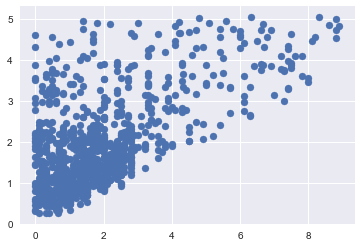

In [822]:
multiplelinear_regression_model(X,y)

In [823]:
# # splitting dataset into training and testing dataset

# from sklearn.cross_validation import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [824]:
print(type(X_train), type(y_train))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [825]:
# #fitting into the model
# from sklearn.linear_model import LinearRegression
# regressor=LinearRegression()
# model = regressor.fit(X_train,y_train)

In [826]:
# y_pred=model.predict(X_test)

In [827]:
# # from sklearn.metrics import mean_squared_error
# # from math import sqrt

# # rmse= np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test)))
# # mean = np.mean(y_test)
                                                              
# mean ,rmse

In [828]:
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CCAvg   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     405.7
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:11:46   Log-Likelihood:                -8512.9
No. Observations:                5000   AIC:                         1.705e+04
Df Residuals:                    4990   BIC:                         1.711e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5153      0.106      4.843      0.000       0.307       0.724
Age              -0.0028      0.002     -1.675      0.094      -0.006       0.000
Income            0.0229      0.001     44.185      0.000       0.022       0.024
Family           -0.0243      0.017     -1.433      0.152      -0.057       0.009
Mortgage         -0.0005      0.000     -2.575      0.010      -0.001      -0.000
CD Account        0.1382      0.085      1.630      0.103      -0.028       0.304
Online           -0.0565      0.039     -1.448      0.148      -0.133       0.020
Personal Loan     0.4012      0.081      4.925      0.000       0.241       0.561
Education_2      -0.1171      0.049     -2.411      0.016      -0.212      -0.022
Education_3      -0.1272      0.047     -2.683      0.007      -0.220      -0.034
==============================================================================
Omnibus:                      236.215   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              597.972
Skew:                           0.257   Prob(JB):                    1.42e-130
Kurtosis:                       4.615   Cond. No.                         800.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [829]:
crossvalidation_model(X_array,y_array)

[2.05581]
[1.3457825749238956]
-----------------------
[2.05581, 1.85415]
[1.3457825749238956, 1.3901886984257232]
-----------------------
[2.05581, 1.85415, 2.02373]
[1.3457825749238956, 1.3901886984257232, 1.3928126273608574]
-----------------------
[2.05581, 1.85415, 2.02373, 1.8651900000000001]
[1.3457825749238956, 1.3901886984257232, 1.3928126273608574, 1.3162433775139497]
-----------------------
[2.05581, 1.85415, 2.02373, 1.8651900000000001, 1.8908099999999999]
[1.3457825749238956, 1.3901886984257232, 1.3928126273608574, 1.3162433775139497, 1.213985556205851]
-----------------------
Caluculating average mean and rmse values after performing K fold
1.9379380000000002
1.3318025668860556


In [830]:
# # RMSE using 5-fold cross-validation
# from sklearn import metrics
# from sklearn.cross_validation import KFold
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
# from sklearn.cross_validation import KFold, cross_val_score, train_test_split
# kf = KFold(len(X_array), n_folds=5)

In [831]:
# scores = [] 
# scores_mean = []
# for train, test in kf:
#     scores_mean.append(np.mean(y_array[test]))
#     regressor.fit(X_array[train],y_array[train])
#     scores.append(np.sqrt(metrics.mean_squared_error(y_array[test], regressor.predict(X_array[test]))))
# print(scores_mean)
# print(scores)

In [832]:
# #Caluculating the average rmse values after the K fold
# K2_mean= np.mean(scores_mean)
# K2_rmse= np.mean(scores)

# K2_mean,K2_rmse

### Answering the questions for Model-2


#### 1. Is the relationship significant?  
Yes, the relationship between the dependent variable CCAvg and few of the independent variables is significant. 

#### 2. Are any model assumptions violated?      
None of the assumptions are voilated. We have checked it right before we started building our linear model.

#### 3. Does the model make sense?  Interpret the meaning of each independent variable.  
Yes, the model makes sense. Columns Age, Family, CD Account, Online have P values > 0.05 . If the p-value is greater than significant level(0.05), then those variables are not significant and hence we can remove them in further modelling. Where as other variables.'Income','Family','Mortgage','Personal Loan','Education_2','Education_3' have P values< 0.05, so they are significant in modelling

#### Cross-validate the model. How well did it do? 
It did not have much effect on the model after performing 5 fold Cross validation. The RMSE value before and after validation is still around 1.33 just like before validation

#### Compare the AIC, BIC and adjusted R^2.  Do they agree in their ranking of the models?
R2  is a measurement of training error. The Higher the R-squared, the better the model. 
In  model 1 its 42 %. The closer it is to 1, the better. This is not fit for linear model.
AIC and BIC isnt very low. So there is scope for improvement.

* AIC is an estimate of the test error that takes bias and variance into account. AIC stands for (Akaike’s Information Criteria), a metric developped by the Japanese Statistician, Hirotugu Akaike, 1970. The basic idea of AIC is to penalize the inclusion of additional variables to a model. It adds a penalty that increases the error when including additional terms. The lower the AIC, the better the model.

* BIC (or Bayesian information criteria) is a variant of AIC with a stronger penalty for including additional variables to the model.

## Model- 3

* For the model 3 we have dropped all the variables which have P value> 0.05- Age, Family, CD Account, Online  and checking the model performance. So 5 independent variables in total.
* According to the assignment requirement, Personal Loan is binary and Education is a multi class variable.

In [833]:
X = df[['Income','Mortgage','Personal Loan','Education_2','Education_3']]
y = df[["CCAvg"]]

In [834]:
X_array= np.array(df[['Income','Mortgage','Personal Loan','Education_2','Education_3']])
y_array = np.array(df[["CCAvg"]])
y
X

,Income,Mortgage,Personal Loan,Education_2,Education_3
0,49,0,0,0,0
1,34,0,0,0,0
2,11,0,0,0,0
3,100,0,0,1,0
4,45,0,0,1,0
5,29,155,0,1,0
6,72,0,0,1,0
7,22,0,0,0,1
8,81,104,0,1,0
9,180,0,1,0,1


In [835]:
#  splitting dataset into training and testing dataset

# from sklearn.cross_validation import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [836]:
# print(type(X_train), type(y_train))

In [837]:
# from sklearn.linear_model import LinearRegression
# regressor=LinearRegression()
# regressor.fit(X_train,y_train)

In [838]:
# y_pred=regressor.predict(X_test)

In [839]:
# from sklearn.metrics import mean_squared_error
# from math import sqrt

# rmse= np.sqrt(metrics.mean_squared_error(y_test, regressor.predict(X_test)))
# mean = np.mean(y_test)
                                                              
# mean ,rmse

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
Scatter plot: 
---------------------------------------
RMSE and mean values
CCAvg    1.89858
dtype: float64
1.336546911910746


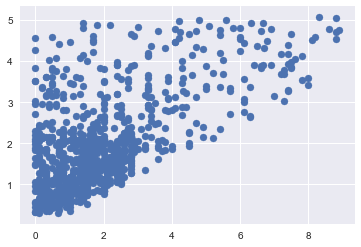

In [840]:
multiplelinear_regression_model(X,y)

In [841]:
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CCAvg   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     727.8
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:11:47   Log-Likelihood:                -8517.3
No. Observations:                5000   AIC:                         1.705e+04
Df Residuals:                    4994   BIC:                         1.709e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2944      0.051      5.805      0.000       0.195       0.394
Income            0.0231      0.001     45.433      0.000       0.022       0.024
Mortgage         -0.0005      0.000     -2.494      0.013      -0.001      -0.000
Personal Loan     0.4179      0.078      5.381      0.000       0.266       0.570
Education_2      -0.1249      0.048     -2.581      0.010      -0.220      -0.030
Education_3      -0.1299      0.047     -2.740      0.006      -0.223      -0.037
==============================================================================
Omnibus:                      235.641   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              589.765
Skew:                           0.260   Prob(JB):                    8.59e-129
Kurtosis:                       4.600   Cond. No.                         598.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P- Values are all less than 0.05

In [842]:
crossvalidation_model(X_array,y_array)

[2.05581]
[1.3468994442502051]
-----------------------
[2.05581, 1.85415]
[1.3468994442502051, 1.3890376843309538]
-----------------------
[2.05581, 1.85415, 2.02373]
[1.3468994442502051, 1.3890376843309538, 1.394602848687475]
-----------------------
[2.05581, 1.85415, 2.02373, 1.8651900000000001]
[1.3468994442502051, 1.3890376843309538, 1.394602848687475, 1.3122256881577217]
-----------------------
[2.05581, 1.85415, 2.02373, 1.8651900000000001, 1.8908099999999999]
[1.3468994442502051, 1.3890376843309538, 1.394602848687475, 1.3122256881577217, 1.2153563792778215]
-----------------------
Caluculating average mean and rmse values after performing K fold
1.9379380000000002
1.3316244089408353


In [843]:
# # RMSE using 5-fold cross-validation
# from sklearn import metrics
# from sklearn.cross_validation import KFold
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
# from sklearn.cross_validation import KFold, cross_val_score, train_test_split
# kf = KFold(len(X_array), n_folds=5)

In [844]:
# scores = [] 
# scores_mean = []
# for train, test in kf:
#     scores_mean.append(np.mean(y_array[test]))
#     regressor.fit(X_array[train],y_array[train])
#     scores.append(np.sqrt(metrics.mean_squared_error(y_array[test], regressor.predict(X_array[test]))))
# print(scores_mean)
# print(scores)

In [845]:
# #average RMSE value

# K2_mean= np.mean(scores_mean)
# K2_rmse = np.mean(scores)

# K2_mean,K2_rmse


### Answering the questions for Model-3


#### 1. Is the relationship significant?  
Yes, the relationship between the dependent variable CCAvg and few of the independent variables is significant. 

#### 2. Are any model assumptions violated?      
None of the assumptions are voilated. We have checked it right before we started building our linear model.

#### 3. Does the model make sense?  Interpret the meaning of each independent variable.  
Yes, the model makes sense. 'Income','Mortgage','Personal Loan','Education_2','Education_3' have P values< 0.05, so they are significant in modelling

#### 4. Cross-validate the model. How well did it do? 
It did not have much effect on the model after performing 5 fold Cross validation. The RMSE value before and after validation is still around 1.33 just like before validation

#### 5. Compare the AIC, BIC and adjusted R^2.  Do they agree in their ranking of the models?
R2  is a measurement of training error. The Higher the R-squared, the better the model. 
In  model 3 its 42 % variance explained. The closer it is to 1, the better. This is not fit for linear model.
AIC and BIC isnt very low. So there is scope for improvement.

* AIC is an estimate of the test error that takes bias and variance into account. AIC stands for (Akaike’s Information Criteria), a metric developped by the Japanese Statistician, Hirotugu Akaike, 1970. The basic idea of AIC is to penalize the inclusion of additional variables to a model. It adds a penalty that increases the error when including additional terms. The lower the AIC, the better the model.

* BIC (or Bayesian information criteria) is a variant of AIC with a stronger penalty for including additional variables to the model.

# PART B- Logistic Regression

It's in another notebook

Link to [LogisticRegression 2](http://localhost:8890/notebooks/Desktop/ADS/Final-%20Logistic%20Regression.ipynb#Answering-Questions-for-Logistic-Regression-Model-1)

# PART C - Multi Collinearity and Step wise regression

*Multi Collinearity* : In regression, "multicollinearity" refers to predictors that are correlated with other predictors. Multicollinearity occurs when your model includes multiple factors that are correlated not just to your response variable, but also to each other. In other words, it results when you have factors that are a bit redundant. 

[Multi-Collinearity](#analyzing-multi-collinearity.jpny)

*Stepwise regression* is an algorithm based on p-values of coefficients of linear regression, and scikit-learn deliberately avoids inferential approach to model learning (significance testing etc). ... For perfectly independent covariates it is equivalent to sorting by p-values.


1. We used VIF factors and heat map to check if there are any Multi-Collinearity. And removed Experience column since it's highly correlating with Age.
2. We performed backward elimination for linear modelling which is  a step-wise regression
3

#### Answer the following:

#### 1. Is there any multi-colinearity in the model?   
'Income','Mortgage','Personal Loan','Education_2','Education_3' are mostly independent. There might be little correlation with Income and Personal loan which doesn't effect the model mch. But we have removed the highly correlated variables in the EDA itself.
#### 2. In the multiple regression models are predictor variables independent of all the other predictor variables?   
Yes, mostly. We have removed columns which has high effect of correlation.
#### 3. In multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model. 
We have performed this using P -values. Removing all the values which has significant level p value>0.05
#### 4. Cross-validate the models. How well did they do? 
Cross validation didnot help in improving the model. We have computed the RMSE values which seem to be almost same evertime.

# PART E - Regularization

1. Regularization is a method for "constraining" or "regularizing" the size of the coefficients, thus "shrinking" them towards zero.
2. It reduces model variance which minimizes overfitting.
3. For a regularized linear regression model, we minimize the sum of RSS and a "penalty term" that penalizes coefficient size.
4. Ridge regression (or "L2 regularization") minimizes:
$$\text{RSS} + \alpha \sum_{j=1}^p \beta_j^2$$
1. $p$ is the number of features
2. $\beta_j$ is a model coefficient
3. $\alpha$ is a tuning parameter:
A tiny $\alpha$ imposes no penalty on the coefficient size, and is equivalent to a normal linear regression model.
Increasing the $\alpha$ penalizes the coefficients and thus shrinks them.

In [846]:
#Using regularization to check whether it will help reduce rmse
#Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

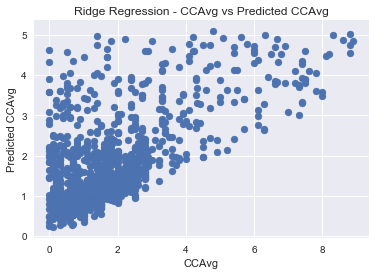

In [847]:
y_pred = ridge.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("CCAvg")
plt.ylabel("Predicted CCAvg")
plt.title("Ridge Regression - CCAvg vs Predicted CCAvg")

In [848]:
#rmse after ridge
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

1.3366301942580312

In [849]:
# RMSE using 5-fold cross-validation on ridge model
kf = KFold(len(X), n_folds=5)
scores = []
for train, test in kf:
    regressor.fit(X_array[train],y_array[train])
    scores.append(np.sqrt(metrics.mean_squared_error(y_array[test], regressor.predict(X_array[test]))))
scores

[1.3468994442502051,
 1.3890376843309538,
 1.394602848687475,
 1.3122256881577217,
 1.2153563792778215]

In [850]:
show_stats('Ridge Regression',rmse ,np.mean(scores))

Method: Ridge Regression
RMSE on no CV training: 1.337
RMSE on 5-fold CV: 1.332


#### Results

* Rmse by regularization is almost same as  5-Fold cross validation, regularization doesn't help in improving rmse of Regularization.
* Rmse on our Model 3 is also 1.33 after performing K fold
* So regularization did not help our model

# Part D - Interaction effects 

* Interaction terms allows us to model relationships when the effects of a feature on the target is influenced by another feature 
* We created two product terms to model two likely interaction effects,IncomeandPersonalloan and MortgageandEducation_2.
* In a multiple regression, is assumed that the effect on the target of increasing one unit of one predictor (is independent|has no influence) on the other predictor
* If this is not the case, sharing a value on two predictors, may have more effect than allocating the entire value to only one.
* In marketing, this is known as a synergy effect, and in statistics it is referred to as an interaction effect.

In [851]:
df['IncomeandPersonalloan'] = df['Income']*df['Personal Loan']

In [852]:
df['MortgageandEducation_2'] = df['Mortgage']*df['Education_2']

In [853]:
X = df[['Income','Mortgage','Personal Loan','Education_2','Education_3','MortgageandEducation_2','IncomeandPersonalloan']]
y = df[["CCAvg"]]

In [854]:
#putting into an array
X_array= np.array(df[['Income','Mortgage','Personal Loan','Education_2','Education_3','MortgageandEducation_2','IncomeandPersonalloan']])
y_array = np.array(df[["CCAvg"]])
y
X

,Income,Mortgage,Personal Loan,Education_2,Education_3,MortgageandEducation_2,IncomeandPersonalloan
0,49,0,0,0,0,0,0
1,34,0,0,0,0,0,0
2,11,0,0,0,0,0,0
3,100,0,0,1,0,0,0
4,45,0,0,1,0,0,0
5,29,155,0,1,0,155,0
6,72,0,0,1,0,0,0
7,22,0,0,0,1,0,0
8,81,104,0,1,0,104,0
9,180,0,1,0,1,0,180


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
Scatter plot: 
---------------------------------------
RMSE and mean values
CCAvg    1.89858
dtype: float64
1.3454724052489457


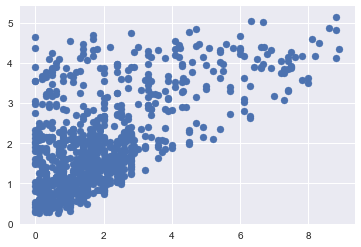

In [855]:
multiplelinear_regression_model(X,y)

In [856]:
crossvalidation_model(X_array,y_array)

[2.05581]
[1.3439544683360258]
-----------------------
[2.05581, 1.85415]
[1.3439544683360258, 1.3819780713083727]
-----------------------
[2.05581, 1.85415, 2.02373]
[1.3439544683360258, 1.3819780713083727, 1.4030936351592609]
-----------------------
[2.05581, 1.85415, 2.02373, 1.8651900000000001]
[1.3439544683360258, 1.3819780713083727, 1.4030936351592609, 1.3098747086112073]
-----------------------
[2.05581, 1.85415, 2.02373, 1.8651900000000001, 1.8908099999999999]
[1.3439544683360258, 1.3819780713083727, 1.4030936351592609, 1.3098747086112073, 1.2140985194995355]
-----------------------
Caluculating average mean and rmse values after performing K fold
1.9379380000000002
1.3305998805828805


In [857]:
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CCAvg   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     524.5
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:11:48   Log-Likelihood:                -8507.4
No. Observations:                5000   AIC:                         1.703e+04
Df Residuals:                    4992   BIC:                         1.708e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2387      0.052      4.553      0.000       0.136       0.342
Income                     0.0237      0.001     45.063      0.000       0.023       0.025
Mortgage                  -0.0004      0.000     -2.000      0.046      -0.001   -8.47e-06
Personal Loan              1.6455      0.288      5.719      0.000       1.081       2.210
Education_2               -0.1048      0.054     -1.954      0.051      -0.210       0.000
Education_3               -0.1054      0.048     -2.213      0.027      -0.199      -0.012
MortgageandEducation_2  3.392e-05      0.000      0.078      0.938      -0.001       0.001
IncomeandPersonalloan     -0.0089      0.002     -4.429      0.000      -0.013      -0.005
==============================================================================
Omnibus:                      247.598   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              614.977
Skew:                           0.281   Prob(JB):                    2.88e-134
Kurtosis:                       4.624   Cond. No.                     2.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* My adj R square after interaction term is 42.3% whereas for Model 3 is 42.1%. Not much difference or synergy effect.
* MortgageandEducation_2 has P value more than 0.05 which is our significant level, so not  a good variable for our model
* IncomeandPersonalloan can be a good predictor because it has P value 0

In [858]:
# # splitting dataset into training and testing dataset

# from sklearn.cross_validation import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [859]:
# print(type(X_train), type(y_train))

In [860]:
# from sklearn.linear_model import LinearRegression
# regressor=LinearRegression()
# regressor.fit(X_train,y_train)

In [861]:
# y_pred=regressor.predict(X_test)

In [862]:
# from sklearn.metrics import mean_squared_error
# from math import sqrt

# rmse= np.sqrt(metrics.mean_squared_error(y_test, regressor.predict(X_test)))
# mean = np.mean(y_test)
                                                              
# mean ,rmse

### Conclusions

 

1. Our data is not so good for the Linear modelling since Rsquare value is very low around 0.41 or 41%
2. It is very good for logistic model- because accuracy is ranging from 91% to 95% in every model
3. Regularization and Cross validation methods din't much help in our linear regression
4. Even the relation between dependent and Independent is not strongly linear, that's why we couldn't get good linear model
5. We have taken p values, in each model and decided which variables are important and which variables are not in every model
6. Confusion matrix values changes since the samples are randomly generated everytime we run


### Contribution

By me : 40%

1. Implemented functions wherever necessary
2. Creating the linear and logistic objects and regression codes
3. Cross validation methods

By External Source: 60%

### Citation

Data set is taken from the kaggle website : https://www.kaggle.com/deyritwik/personal-loan-prediction/data

#### *Other sources used:For Linear Regression*

1. https://www.statisticssolutions.com/assumptions-of-multiple-linear-regression/
2. http://www.thejavageek.com/2018/02/14/backward-elimination-multiple-linear-regression/
3. https://medium.com/@manjabogicevic/multiple-linear-regression-using-python-b99754591ac0
4. http://www.stephacking.com/multivariate-linear-regression-python-step-6-backward-elimination/
5. https://www.kaggle.com/umeshsati54/backward-elimination
6.http://www.sthda.com/english/articles/38-regression-model-validation/158-regression-model-accuracy-metrics-r-square-aic-bic-cp-and-more/
7. https://www.kaggle.com/iconoclash/personal-loan-dataset-binary-classification/data

#### *For Logistic*

1.http://www.data-mania.com/blog/logistic-regression-example-in-python/
2.https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac
3.https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
4.https://dzone.com/articles/understanding-the-confusion-matrix

#### *For Multi Collinearity*
1. https://www.statisticshowto.datasciencecentral.com/variance-inflation-factor/

#### *Regularization*

1. https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

#### *For Interactions*

1. https://www.dummies.com/programming/big-data/data-science/data-science-how-to-create-interactions-between-variables-with-python/

### Copyright 

Copyright 2019 Monisha Vodnala

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.